In [55]:
import pandas as pd
import torch
import random
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [56]:
train = pd.read_csv("../Data/hindi_train.csv")
train.head()

,Id,Heading,Summary,Article
0,hindi_2023_train_0,"गला दबाकर हत्या की; बॉडी बोरे में भरी, लोकल मा...",Kerala Minor Girl Rape Case - केरल के एर्नाकुल...,केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1,hindi_2023_train_1,तेलंगाना में 18 की जान गई; जम्मू-कश्मीर में बा...,इस साल मानसून सीजन में कई राज्यों में भारी तबा...,मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2,hindi_2023_train_2,"राजस्थान सरकार बनाएगी कर्ज राहत आयोग, कोर्ट के...",चुनावी साल में राजस्थान सरकार किसानों को लुभान...,चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3,hindi_2023_train_3,"3 से 7 अगस्त तक कर सकेंगे अप्लाय, प्राइस बैंड ...",Non-banking lender SBFC Finance's initial publ...,नॉन बैंकिग फाइनेंस कंपनी 'SBFC फाइनेंस लिमिटेड...
4,hindi_2023_train_4,"डाइनिंग टेबल पर कुकर-कड़ाही न सजाएं, चीन के खा...",स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...,स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...


In [57]:
print(train.head(1)["Heading"])

0    गला दबाकर हत्या की; बॉडी बोरे में भरी, लोकल मा...
Name: Heading, dtype: object


In [58]:
train.shape

(21225, 4)

In [59]:
test = pd.read_csv("../Data/HindiNews_test.csv")
test.shape

(3000, 3)

In [60]:
test.head(5)

,id,Article,Heading
0,HindiNews_test_0,‘वारिस पंजाब दे’ संगठन के चीफ अमृतपाल सिंह को ...,भिंडरांवाले के गांव में वारिस पंजाब दे का चीफ ...
1,HindiNews_test_1,कांग्रेस नेता राहुल गांधी जल्द ही साउथ दिल्ली ...,सांसदी जाने के बाद अप्रैल में सरकारी बंगला छोड़...
2,HindiNews_test_2,संसद परिसर में मंगलवार को आम आदमी पार्टी (AAP)...,"BJP का तंज- झूठ बोले कौआ काटे, राघव का पलटवार-..."
3,HindiNews_test_3,राष्ट्रीय लोकतांत्रिक पार्टी (RLP) के प्रमुख औ...,"हनुमान बेनीवाल बोले- कांग्रेस छोड़ दें सचिन, ह..."
4,HindiNews_test_4,मैं कश्मीर से हूं। बचपन में मुझे बताया गया कि ...,कोई मारपीट से सुधारना चाहता तो कोई समझता मनोरो...


In [61]:
test["Heading"][25]

'दुधवा नेशनल पार्क में हाथियों के झुंड के सामने सेल्फी ले रहे थे, जान बचाकर भागे'

In [62]:
import re
def preprocess_tokenize(text):
      # for removing punctuation from sentencesc
    text = str(text)
    # text = re.sub(r'(\d+)', r'', text) # remove numbers
    
    text = text.replace('\n', ' ')
    text = text.replace('\r', ' ')
    text = text.replace('\t', ' ')
    text = text.replace('\u200d', '') #
    text=re.sub("(__+)", ' ', str(text)).lower()   #remove _ if it occors more than one time consecutively
    text=re.sub("(--+)", ' ', str(text)).lower()   #remove - if it occors more than one time consecutively
    text=re.sub("(~~+)", ' ', str(text)).lower()   #remove ~ if it occors more than one time consecutively
    text=re.sub("(\+\++)", ' ', str(text)).lower()   #remove + if it occors more than one time consecutively
    text=re.sub("(\.\.+)", ' ', str(text)).lower()   #remove . if it occors more than one time consecutively
    text=re.sub(r"[&©@#ø;.~*!]", ' ', str(text)).lower() #remove <>()|&©ø"',;?~*!
    # text = re.sub(r"[‘’।:]", " ", str(text)) #removing other special characters
    # text = re.sub("([a-zA-Z])",' ',str(text)).lower() #removing all the single characters
    text = re.sub("(\s+)",' ',str(text)).lower() #removing extra spaces
    return text

In [81]:
train_data_src = train['Article']
train_data_trg = train['Summary']

In [82]:
tokenized_corpus_trg = [preprocess_tokenize(x) for x in train_data_trg]  #these are Summaries
tokenized_corpus_src = [preprocess_tokenize(x) for x in train_data_src]  #these are articles

In [83]:
tokenized_corpus_src[:10]

['केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई। आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया था। पुलिस ने आरोपी शख्स को गिरफ्तार कर लिया है। घटना शुक्रवार शाम की है। पुलिस ने शनिवार को मीडिया को इसकी जानकारी दी। cctv फुटेज में बच्ची के साथ नजर आया आरोपी एर्नाकुलम sp विवेक कुमार ने बताया- बच्ची शुक्रवार शाम को किडनैप हुई थी। हमारी टीम ने cctv फुटेज चेक किए जिसमें बच्ची को आरोपी के साथ देखा गया। उसी दिन रात 9 30 बजे आरोपी को गिरफ्तार कर लिया गया। उस समय वह नशे की हालत में था और बच्ची उसके साथ नहीं थी। स्थानीय लोगों ने बच्ची को मार्केट के पास आरोपी के साथ देखा था। उन्होंने पुलिस को इसकी जानकारी दी। पुलिस ने पूरे एरिया में सर्चिंग की तो मार्केट के पीछे बच्ची की लाश मिली। इस इलाके में लोग कूड़ा फेंकते थे और कई असामाजिक लोग यहां नशा करने आते थे। बच्ची की बिल्डिंग में ही रहता था आरोपी पुलिस ने बताया- आरोपी शख्स बिहार का रहने वाला है और केरल में मजदूरी करता है। बच्ची के माता-पिता भी बिहार के हैं और मजदूरी करते हैं। जिस इमारत में बच्ची रहत

In [84]:
tokenized_corpus_trg[:10] 

['kerala minor girl rape case - केरल के एर्नाकुलम जिले में 5 साल की बच्ची से रेप के बाद गला दबाकर हत्या कर दी गई। आरोपी ने बच्ची का शव बोरे में डालकर डंपिंग ग्राउंड में फेंक दिया',
 'इस साल मानसून सीजन में कई राज्यों में भारी तबाही मची है। हिमाचल प्रदेश में अब तक 187 लोगों की जान जा चुकी है। वहीं तेलंगाना में एक हफ्ते में 18 लोगों की मौत हो गई। तेलंगाना में करीब 12,000 लोगों को राहत शिविरों में bihar up monsoon rainfall update rajasthan indore bhopal | chhattisgarh, west bengal weather forecast',
 'चुनावी साल में राजस्थान सरकार किसानों को लुभाने के लिए बिल लेकर आ रही है। किसान कर्ज राहत आयोग बिल को दो अगस्त को विधानसभा में पेश करके पारित करवाने की तैयारी है। यह बिल पारित होने के बाद किसान कर्जमाफी आयोग बनाने का रास्ता gehlot government will form farmers loan waiver commission',
 "non-banking lender sbfc finance's initial public offering (ipo) finance ipo details | everything you need to know नॉन बैंकिग फाइनेंस कंपनी 'sbfc फाइनेंस लिमिटेड' का ipo पब्लिक सब्सक्रिप्शन के लिए अगले हफ्ते ओप

In [85]:
len(tokenized_corpus_src), len(tokenized_corpus_trg)

(21225, 21225)

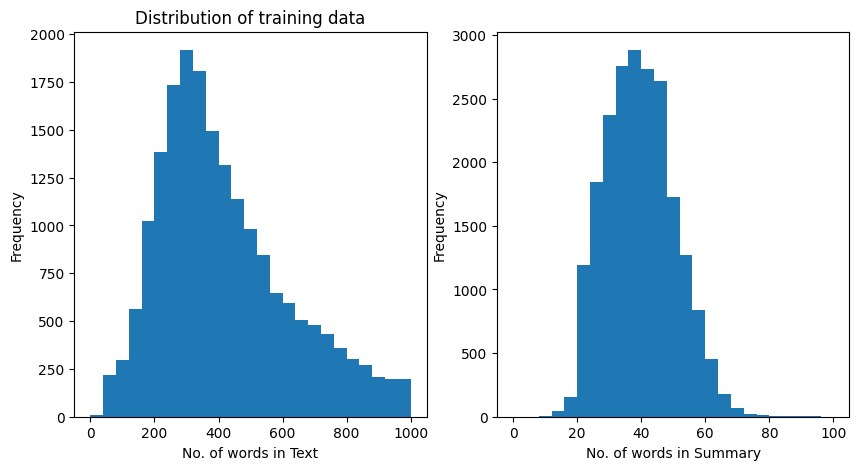

In [86]:
import matplotlib.pyplot as plt

text_word_count = []
summary_word_count = []

# populate the lists with sentence lengths
for i in tokenized_corpus_src[:train.shape[0]]:
      text_word_count.append(len(i.split()))

for i in tokenized_corpus_trg[:train.shape[0]]:
      summary_word_count.append(len(i.split()))

fig , ax = plt.subplots(1,2)
fig.set_size_inches(10,5)
ax[0].hist(text_word_count, bins=25, range=[0, 1000])
ax[1].hist(summary_word_count, bins=25, range=[0, 100])
ax[0].set_xlabel("No. of words in Text")
ax[0].set_ylabel("Frequency")
ax[1].set_xlabel("No. of words in Summary")
ax[1].set_ylabel("Frequency")
ax[0].set_title('Distribution of training data')
plt.show()

In [87]:
# for i in tokenized_corpus_src[:-test.shape[0]]:
#       text_word_count.append(len(i.split()))

# for i in tokenized_corpus_trg[:-test.shape[0]]:
#       summary_word_count.append(len(i.split()))

# fig , ax = plt.subplots(1,2)
# fig.set_size_inches(10,5)
# ax[0].hist(text_word_count, bins=25, range=[0, 1000])
# ax[1].hist(summary_word_count, bins=25, range=[0, 100])
# ax[0].set_xlabel("No. of words in Text")
# ax[0].set_ylabel("Frequency")
# ax[1].set_xlabel("No. of words in Summary")
# ax[1].set_ylabel("Frequency")
# ax[0].set_title('Distribution of Testing data')
# plt.show()

In [88]:
train['Text_Cleaned'] = tokenized_corpus_src  
print("::::: Text_Cleaned :::::")
print(train['Text_Cleaned'][0:5], "\n")


train['Summary_Cleaned'] =  tokenized_corpus_trg 
print("::::: Summary :::::")
print(train['Summary_Cleaned'][0:5], "\n")

corpus = list(train['Text_Cleaned'])

::::: Text_Cleaned :::::
0    केरल के एर्नाकुलम जिले में 5 साल की बच्ची से र...
1    मानसून सीजन में हुई भारी बारिश ने कई राज्यों म...
2    चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3    नॉन बैंकिग फाइनेंस कंपनी 'sbfc फाइनेंस लिमिटेड...
4    स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...
Name: Text_Cleaned, dtype: object 

::::: Summary :::::
0    kerala minor girl rape case - केरल के एर्नाकुल...
1    इस साल मानसून सीजन में कई राज्यों में भारी तबा...
2    चुनावी साल में राजस्थान सरकार किसानों को लुभान...
3    non-banking lender sbfc finance's initial publ...
4    स्वाद खाने की बुनियाद है। लेकिन अगर खाना सुंदर...
Name: Summary_Cleaned, dtype: object 



In [89]:
text_count = []
summary_count = []

for sent in train['Text_Cleaned']:
    text_count.append(len(sent.split()))
for sent in train['Summary_Cleaned']:
    summary_count.append(len(sent.split()))

graph_df = pd.DataFrame()
graph_df['text'] = text_count
graph_df['summary'] = summary_count

In [90]:
graph_df['text'].describe()

count    21225.000000
mean       537.174229
std        417.439740
min          0.000000
25%        281.000000
50%        404.000000
75%        636.000000
max       3635.000000
Name: text, dtype: float64

In [91]:
graph_df['summary'].describe()

count    21225.000000
mean        39.148598
std         10.829212
min         10.000000
25%         31.000000
50%         39.000000
75%         46.000000
max        102.000000
Name: summary, dtype: float64

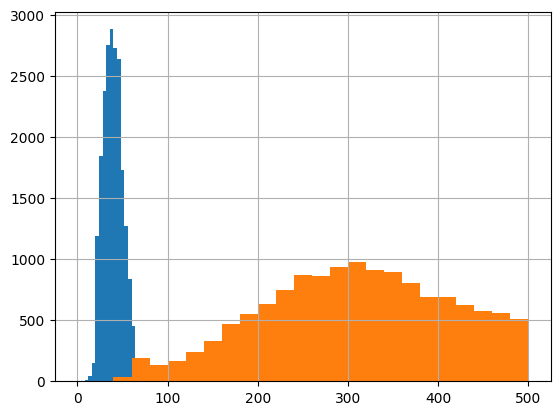

In [101]:
# The plot shows the distribution of the number of words in the text and summary columns.
graph_df['text'].hist(bins = 25, range=(0, 500))
plt.show()

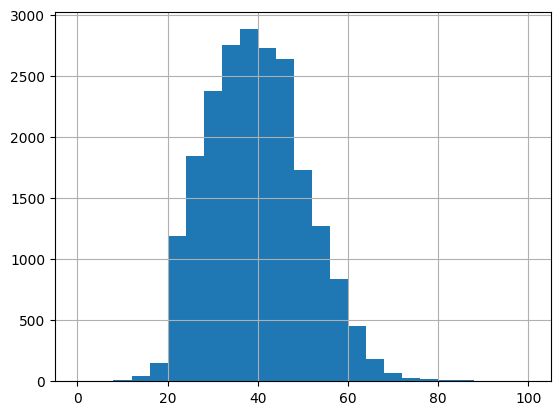

In [105]:
# The plot shows the distribution of the number of words in the text and summary columns.
graph_df['summary'].hist(bins = 25, range=(0, 100))
plt.show()

In [112]:
count = 0
for i in graph_df['text']:
    if i > 10 and i <= 300:
        count = count + 1
print(count / len(graph_df['text']))

0.29267373380447587


In [115]:
count = 0
for i in graph_df['summary']:
    if i > 0 and i <= 100:
        count = count + 1
print(count / len(graph_df['summary']))

0.9999528857479387


In [117]:
max_text_len = 300
max_summary_len = 16

In [118]:
cleaned_text = np.array(train['Text_Cleaned'])
cleaned_summary = np.array(train['Summary_Cleaned'])

short_text = []
short_summary = []

for i in range(len(cleaned_text)):
    if(len(cleaned_summary[i].split()) <= max_summary_len 
       and len(cleaned_summary[i].split()) > 1 
       and len(cleaned_text[i].split()) <= max_text_len):
        short_text.append(cleaned_text[i])
        short_summary.append(cleaned_summary[i])
    elif((len(cleaned_summary[i].split()) > max_summary_len) or (len(cleaned_text[i].split()) > max_text_len)):
        summ = cleaned_summary[i].split()
        txt = cleaned_text[i].split()
        if(len(summ)>max_summary_len):
          short_summary.append(' '.join(summ[:max_summary_len]))
        else:
          short_summary.append(cleaned_summary[i])
        if(len(txt)>max_text_len):
          short_text.append(' '.join(txt[:max_text_len]))
        else:
          short_text.append(cleaned_text[i]) 
    
post_pre = pd.DataFrame({'text':short_text,'summary':short_summary})

In [119]:
post_pre['summary'] = post_pre['summary'].apply(lambda x : 'sostok '+ x + ' eostok')
post_pre['text'] = post_pre['text'].apply(lambda x: 'sostok ' + x + ' eostok')

In [120]:
post_pre.shape

(21225, 2)

In [121]:
cleaned_summary = np.array(post_pre['summary'])
cleaned_text = np.array(post_pre['text'])
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (21225,)
cleaned summary's size  (21225,)


In [30]:
from keras.preprocessing.text import Tokenizer 
from keras.preprocessing.sequence import pad_sequences

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [31]:
#Tokenize text to get the vocab count
#prepare a tokenizer for training data
text_tokenizer = Tokenizer() 
text_tokenizer.fit_on_texts(list(cleaned_text))

#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer()   
summary_tokenizer.fit_on_texts(list(cleaned_summary))

In [32]:
vocab = text_tokenizer.word_index
import random
def sample_from_dict(d, sample=10):
    keys = random.sample(list(d), sample)
    values = [d[k] for k in keys]
    return dict(zip(keys, values))

print(sample_from_dict(vocab))

{'पिरवार': 134988, 'उद्धघाटन': 41518, 'डबखेरा': 286248, 'टिप्प्णियां': 352025, 'थीनिया': 175388, 'एतो': 256613, 'भिड़त': 39100, 'एलाइफ': 121226, 'नखवाल': 96914, 'नरेंद्रासन': 142353}


In [33]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in text_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 68.68167602630879
Total Coverage of rare words: 0.41351097036187695


In [34]:
# #prepare a tokenizer for reviews on training data
text_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
text_tokenizer.fit_on_texts(list(cleaned_text))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
text__seq    =   text_tokenizer.texts_to_sequences(cleaned_text)
#padding zero upto maximum length
cleaned_text    =   pad_sequences(text__seq,  maxlen=max_text_len, padding='post')

#size of vocabulary ( +1 for padding token)
text_voc   =  text_tokenizer.num_words + 1

print("Size of vocabulary in text = {}".format(text_voc))

Size of vocabulary in text = 110757


In [35]:
thresh=4

cnt=0
tot_cnt=0
freq=0
tot_freq=0

for key,value in summary_tokenizer.word_counts.items():
    tot_cnt=tot_cnt+1
    tot_freq=tot_freq+value
    if(value<thresh):
        cnt=cnt+1
        freq=freq+value
    
print("% of rare words in vocabulary:",(cnt/tot_cnt)*100)
print("Total Coverage of rare words:",(freq/tot_freq)*100)

% of rare words in vocabulary: 58.05363524028988
Total Coverage of rare words: 1.1603857371100994


In [36]:
#prepare a tokenizer for reviews on training data
summary_tokenizer = Tokenizer(num_words = tot_cnt - cnt) 
summary_tokenizer.fit_on_texts(list(cleaned_summary))

#convert text sequences into integer sequences (i.e one-hot encodeing all the words)
summary__seq    =   summary_tokenizer.texts_to_sequences(cleaned_summary)
#padding zero upto maximum length
cleaned_summary    =   pad_sequences(summary__seq,  maxlen=max_summary_len, padding='post')

#size of vocabulary ( +1 for padding token)
summary_voc   =  summary_tokenizer.num_words + 1

print("Size of vocabulary in summary = {}".format(summary_voc))

Size of vocabulary in summary = 25121


In [37]:
summary_tokenizer.word_counts['sostok'],len(cleaned_summary)

(333143, 333143)

In [38]:
default_path = '/kaggle/working/'

In [39]:
import pickle

with open(default_path+'text_tokenizer.pickle', 'wb') as handle:
    pickle.dump(text_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'summary_tokenizer.pickle', 'wb') as handle:
    pickle.dump(summary_tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [40]:
ind=[]
for i in range(len(cleaned_summary)):
    cnt=0
    for j in cleaned_summary[i]:
        if j!=0:
            cnt=cnt+1
    if(cnt==2):
        ind.append(i)

cleaned_text = np.delete(cleaned_text, ind, axis=0)
cleaned_summary = np.delete(cleaned_summary, ind, axis=0)

In [41]:
print("cleaned text's size ",cleaned_text.shape)
print("cleaned summary's size ",cleaned_summary.shape)

cleaned text's size  (333130, 300)
cleaned summary's size  (333130, 16)


In [42]:
cleaned_text

array([[   24,    56,     2, ...,     0,     0,     0],
       [11094,     1,  1708, ...,   162,  3278,    25],
       [   24,   580,   333, ...,     0,     0,     0],
       ...,
       [    6,   580,   665, ..., 18583,     8,    25],
       [   24,  2442,  1083, ...,     0,     0,     0],
       [   24,   310,     1, ...,     0,     0,     0]], dtype=int32)

In [43]:
cleaned_summary

array([[    1,    21,     3, ...,     2,     0,     0],
       [    1,  9770,   206, ...,     0,     0,     0],
       [    1,     3,    68, ...,     2,     0,     0],
       ...,
       [    1,    68,     9, ...,     0,     0,     0],
       [   94,    23,    12, ..., 17783, 11079,     2],
       [    1,     4,    26, ...,     2,     0,     0]], dtype=int32)

In [44]:
with open(default_path+'cleaned_text.pickle', 'wb') as handle:
    pickle.dump(cleaned_text, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'cleaned_summary.pickle', 'wb') as handle:
    pickle.dump(cleaned_summary, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [45]:
!pip install fasttext

In [46]:
import fasttext.util

In [47]:
fasttext.util.download_model('hi', if_exists='ignore')  # Hindi

 (100.00%) [==================================================>]


'cc.hi.300.bin'

In [48]:
ft = fasttext.load_model(default_path+'cc.hi.300.bin')

In [49]:
word = "नृत्य"
print("Embedding vector shape is {}".format(ft.get_word_vector(word).shape[0]))

Embedding vector shape is 300


In [50]:
def create_weight_matrix(model, DICT_SIZE, tokenizer):
  '''
  Accepts word embedding model
  and the second model, if provided
  Returns weight matrix of size m*n, where
  m - size of the dictionary
  n - size of the word embedding vector

  '''
  vector_size = model.get_word_vector("नृत्य").shape[0]
  w_matrix = np.zeros((DICT_SIZE, vector_size))
  unk_words = []
  text_words = []
  for word, index in tokenizer.word_index.items():
    if index < DICT_SIZE:
      if word in model.words: 
        w_matrix[index] = model.get_word_vector(word)
        text_words.append(word)
      else:
        w_matrix[index] = np.random.rand(1, vector_size)
        unk_words.append(word)
        
  
  print('{} words were considered as they were found in embedding space:'.format(len(text_words)))
  print('{} are some such words'.format(text_words[:10]))
  print()  
  print('{} words were randomly alloted as they were not found in embedding space:'.format(len(unk_words)))
  print('{} are some such words'.format(unk_words[:10]))

  return w_matrix

In [51]:
text_matrix = create_weight_matrix(ft, text_voc, text_tokenizer)

101084 words were considered as they were found in embedding space:
['के', 'में', 'है', 'की', 'को', 'ने', 'से', 'और', 'का', 'पर'] are some such words

9672 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'सिंबा', 'जेजेपी', 'एयरस्ट्राइक', 'रियलमी', 'इनपुटः', 'मीटू', 'एनालिटिका', 'आर्काइव्ड'] are some such words


In [52]:
summ_matrix = create_weight_matrix(ft, summary_voc, summary_tokenizer)

24917 words were considered as they were found in embedding space:
['में', 'के', 'की', 'का', 'ने', 'से', 'को', 'पर', 'है', 'नहीं'] are some such words

203 words were randomly alloted as they were not found in embedding space:
['sostok', 'eostok', 'एयरस्ट्राइक', 'दीपवीर', 'सिंबा', 'फरीदाबादः', 'रसूखदारः', 'ओडिशाः', 'मिजाजः', 'तेलंगानाः'] are some such words


In [53]:
with open(default_path+'text_matrix.pickle', 'wb') as handle:
    pickle.dump(text_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open(default_path+'summ_matrix.pickle', 'wb') as handle:
    pickle.dump(summ_matrix, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [54]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
import time
import re
import pickle
import matplotlib.pyplot as plt

In [55]:
BUFFER_SIZE = 20000
BATCH_SIZE = 64

In [56]:
with open(default_path+'cleaned_text.pickle', 'rb') as handle:
    cleaned_text = pickle.load(handle)
with open(default_path+'cleaned_summary.pickle', 'rb') as handle:
    cleaned_summary = pickle.load(handle)

In [57]:
cleaned_text.shape

(333130, 300)

In [58]:
x_train, y_train = cleaned_text[:cleaned_text.shape[0]-test.shape[0], :], cleaned_summary[:cleaned_summary.shape[0]-test.shape[0], :]
x_test, y_test = cleaned_text[:-test.shape[0], :], cleaned_summary[:-test.shape[0], :]
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).batch(BATCH_SIZE)

In [59]:
def get_angles(position, i, d_model):
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(d_model))
    return position * angle_rates

In [60]:
def positional_encoding(position, d_model):
    angle_rads = get_angles(
        np.arange(position)[:, np.newaxis],
        np.arange(d_model)[np.newaxis, :],
        d_model
    )

    # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])

    # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])

    pos_encoding = angle_rads[np.newaxis, ...]

    return tf.cast(pos_encoding, dtype=tf.float32)

In [61]:
def create_padding_mask(seq):
    seq = tf.cast(tf.math.equal(seq, 0), tf.float32)
    return seq[:, tf.newaxis, tf.newaxis, :]
def create_look_ahead_mask(size):
    mask = 1 - tf.linalg.band_part(tf.ones((size, size)), -1, 0)
    return mask

In [62]:
def scaled_dot_product_attention(q, k, v, mask):
    matmul_qk = tf.matmul(q, k, transpose_b=True)

    dk = tf.cast(tf.shape(k)[-1], tf.float32)
    scaled_attention_logits = matmul_qk / tf.math.sqrt(dk)

    if mask is not None:
        scaled_attention_logits += (mask * -1e9)  

    attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)

    output = tf.matmul(attention_weights, v)
    return output, attention_weights

In [63]:
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads):
        super(MultiHeadAttention, self).__init__()
        self.num_heads = num_heads
        self.d_model = d_model

        assert d_model % self.num_heads == 0

        self.depth = d_model // self.num_heads

        self.wq = tf.keras.layers.Dense(d_model)
        self.wk = tf.keras.layers.Dense(d_model)
        self.wv = tf.keras.layers.Dense(d_model)

        self.dense = tf.keras.layers.Dense(d_model)
        
    def split_heads(self, x, batch_size):
        x = tf.reshape(x, (batch_size, -1, self.num_heads, self.depth))
        return tf.transpose(x, perm=[0, 2, 1, 3])
    
    def call(self, v, k, q, mask):
        batch_size = tf.shape(q)[0]

        q = self.wq(q)
        k = self.wk(k)
        v = self.wv(v)

        q = self.split_heads(q, batch_size)
        k = self.split_heads(k, batch_size)
        v = self.split_heads(v, batch_size)

        scaled_attention, attention_weights = scaled_dot_product_attention(
            q, k, v, mask)

        scaled_attention = tf.transpose(scaled_attention, perm=[0, 2, 1, 3])

        concat_attention = tf.reshape(scaled_attention, (batch_size, -1, self.d_model))
        output = self.dense(concat_attention)
            
        return output, attention_weights

In [64]:
def point_wise_feed_forward_network(d_model, dff):
    return tf.keras.Sequential([
        tf.keras.layers.Dense(dff, activation='relu'),
        tf.keras.layers.Dense(d_model)
    ])

In [65]:
class EncoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(EncoderLayer, self).__init__()

        self.mha = MultiHeadAttention(d_model, num_heads)
        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
    
    def call(self, x, training, mask):
        attn_output, _ = self.mha(x, x, x, mask)
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(x + attn_output)

        ffn_output = self.ffn(out1)
        ffn_output = self.dropout2(ffn_output, training=training)
        out2 = self.layernorm2(out1 + ffn_output)

        return out2

In [66]:
class DecoderLayer(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, dff, rate=0.1):
        super(DecoderLayer, self).__init__()

        self.mha1 = MultiHeadAttention(d_model, num_heads)
        self.mha2 = MultiHeadAttention(d_model, num_heads)

        self.ffn = point_wise_feed_forward_network(d_model, dff)

        self.layernorm1 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = tf.keras.layers.LayerNormalization(epsilon=1e-6)
        self.layernorm3 = tf.keras.layers.LayerNormalization(epsilon=1e-6)

        self.dropout1 = tf.keras.layers.Dropout(rate)
        self.dropout2 = tf.keras.layers.Dropout(rate)
        self.dropout3 = tf.keras.layers.Dropout(rate)
    
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        attn1, attn_weights_block1 = self.mha1(x, x, x, look_ahead_mask)
        attn1 = self.dropout1(attn1, training=training)
        out1 = self.layernorm1(attn1 + x)

        attn2, attn_weights_block2 = self.mha2(enc_output, enc_output, out1, padding_mask)
        attn2 = self.dropout2(attn2, training=training)
        out2 = self.layernorm2(attn2 + out1)

        ffn_output = self.ffn(out2)
        ffn_output = self.dropout3(ffn_output, training=training)
        out3 = self.layernorm3(ffn_output + out2)

        return out3, attn_weights_block1, attn_weights_block2

In [67]:
class Encoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Encoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        self.embedding = tf.keras.layers.Embedding(input_dim = input_vocab_size, 
                      output_dim = d_model,
                      input_length = max_len, # max_len of text sequence - 300
                      weights=[emb_matrix],
                      trainable=False) # static weights to be assigned from pretrained embedding
        #self.embedding = tf.keras.layers.Embedding(input_vocab_size, d_model)
        self.pos_encoding = positional_encoding(maximum_position_encoding, self.d_model)

        self.enc_layers = [EncoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]

        self.dropout = tf.keras.layers.Dropout(rate)
        
    def call(self, x, training, mask):
        seq_len = tf.shape(x)[1]

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)
    
        for i in range(self.num_layers):
            x = self.enc_layers[i](x, training, mask)
    
        return x

In [68]:
class Decoder(tf.keras.layers.Layer):
    def __init__(self, num_layers, d_model, num_heads, dff, target_vocab_size, maximum_position_encoding, emb_matrix, max_len, rate=0.1):
        super(Decoder, self).__init__()

        self.d_model = d_model
        self.num_layers = num_layers

        #self.embedding = tf.keras.layers.Embedding(target_vocab_size, d_model)
        self.embedding = tf.keras.layers.Embedding(input_dim = target_vocab_size, 
                      output_dim = d_model,
                      input_length = max_len, # max_len of summ sequence - 16
                      weights=[emb_matrix],
                      trainable=False)
        self.pos_encoding = positional_encoding(maximum_position_encoding, d_model)

        self.dec_layers = [DecoderLayer(d_model, num_heads, dff, rate) for _ in range(num_layers)]
        self.dropout = tf.keras.layers.Dropout(rate)
    
    def call(self, x, enc_output, training, look_ahead_mask, padding_mask):
        seq_len = tf.shape(x)[1]
        attention_weights = {}

        x = self.embedding(x)
        x *= tf.math.sqrt(tf.cast(self.d_model, tf.float32))
        x += self.pos_encoding[:, :seq_len, :]

        x = self.dropout(x, training=training)

        for i in range(self.num_layers):
            x, block1, block2 = self.dec_layers[i](x, enc_output, training, look_ahead_mask, padding_mask)

            attention_weights['decoder_layer{}_block1'.format(i+1)] = block1
            attention_weights['decoder_layer{}_block2'.format(i+1)] = block2
    
        return x, attention_weights

In [69]:
class Transformer(tf.keras.Model):
    def __init__(self, num_layers, d_model, num_heads, dff, input_vocab_size, target_vocab_size, pe_input, pe_target, text_matrix, max_len_text, summ_matrix, max_len_summ, rate=0.1):
        super(Transformer, self).__init__()

        self.encoder = Encoder(num_layers, d_model, num_heads, dff, input_vocab_size, pe_input, text_matrix, max_len_text, rate)

        self.decoder = Decoder(num_layers, d_model, num_heads, dff, target_vocab_size, pe_target, summ_matrix, max_len_summ, rate)

        self.final_layer = tf.keras.layers.Dense(target_vocab_size)
    
    def call(self, inp, tar, training, enc_padding_mask, look_ahead_mask, dec_padding_mask):
        enc_output = self.encoder(inp, training, enc_padding_mask)

        dec_output, attention_weights = self.decoder(tar, enc_output, training, look_ahead_mask, dec_padding_mask)

        final_output = self.final_layer(dec_output)

        return final_output, attention_weights

In [70]:
with open(default_path+'text_matrix.pickle', 'rb') as handle:
    text_matrix = pickle.load(handle)
with open(default_path+'summ_matrix.pickle', 'rb') as handle:
    summ_matrix = pickle.load(handle)

In [71]:
# hyper-params
num_layers = 4
d_model = text_matrix.shape[1]
dff = 512
num_heads = 10
EPOCHS = 10
max_len_text = 300
max_len_summ = 16

In [72]:
encoder_vocab_size = 110757
decoder_vocab_size = 25121

In [73]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = d_model
        self.d_model = tf.cast(self.d_model, tf.float32)

        self.warmup_steps = warmup_steps
    
    def __call__(self, step):
        arg1 = tf.math.rsqrt(step)
        arg2 = step * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [74]:
class CustomSchedule(tf.keras.optimizers.schedules.LearningRateSchedule):
    def __init__(self, d_model, warmup_steps=4000):
        super(CustomSchedule, self).__init__()

        self.d_model = tf.cast(d_model, tf.float32)
        self.warmup_steps = warmup_steps

    def __call__(self, step):
        arg1 = tf.cast(tf.math.rsqrt(tf.cast(step, tf.float32)), tf.float32)
        arg2 = tf.cast(step, tf.float32) * (self.warmup_steps ** -1.5)

        return tf.math.rsqrt(self.d_model) * tf.math.minimum(arg1, arg2)

In [75]:
learning_rate = CustomSchedule(d_model)

optimizer = tf.keras.optimizers.Adam(learning_rate, beta_1=0.9, beta_2=0.98, epsilon=1e-9)
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True, reduction='none')
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask

    return tf.reduce_sum(loss_)/tf.reduce_sum(mask)
train_loss = tf.keras.metrics.Mean(name='train_loss')

In [76]:
val_loss = tf.keras.metrics.Mean(name='val_loss')

In [77]:
transformer = Transformer(
    num_layers, 
    d_model, 
    num_heads, 
    dff,
    encoder_vocab_size, 
    decoder_vocab_size, 
    pe_input = encoder_vocab_size, 
    pe_target = decoder_vocab_size,
    text_matrix = text_matrix, 
    max_len_text = max_len_text, 
    summ_matrix = summ_matrix, 
    max_len_summ = max_len_summ
)

In [78]:
def create_masks(inp, tar):
    enc_padding_mask = create_padding_mask(inp)
    dec_padding_mask = create_padding_mask(inp)

    look_ahead_mask = create_look_ahead_mask(tf.shape(tar)[1])
    dec_target_padding_mask = create_padding_mask(tar)
    combined_mask = tf.maximum(dec_target_padding_mask, look_ahead_mask)
  
    return enc_padding_mask, combined_mask, dec_padding_mask

In [79]:
checkpoint_path = default_path+"checkpoints"

ckpt = tf.train.Checkpoint(transformer=transformer, optimizer=optimizer)

ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

if ckpt_manager.latest_checkpoint:
    ckpt.restore(ckpt_manager.latest_checkpoint)
    print ('Latest checkpoint restored!!')

In [80]:
@tf.function
def train_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            True, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
        
    gradients = tape.gradient(loss, transformer.trainable_variables)    
    optimizer.apply_gradients(zip(gradients, transformer.trainable_variables))

    train_loss(loss)

In [81]:
@tf.function
def val_step(inp, tar):
    tar_inp = tar[:, :-1]
    tar_real = tar[:, 1:]

    enc_padding_mask, combined_mask, dec_padding_mask = create_masks(inp, tar_inp)

    with tf.GradientTape() as tape:
        predictions, _ = transformer(
            inp, tar_inp, 
            False, 
            enc_padding_mask, 
            combined_mask, 
            dec_padding_mask
        )
        loss = loss_function(tar_real, predictions)
    val_loss(loss)

Epoch 1 ========> Batch 0 Loss 10.1359
Epoch 1 ========> Batch 2601 Loss 6.4889
Epoch 1/10 ========> Training Loss 6.0228 Test/Validation Loss 4.9520
Time taken for epoch 1: 2139.78 secs

Epoch 2 ========> Batch 0 Loss 5.2897
Epoch 2 ========> Batch 2601 Loss 4.9086
Saving checkpoint for epoch 2 at /kaggle/working/checkpoints/ckpt-1
Epoch 2/10 ========> Training Loss 4.8231 Test/Validation Loss 4.5020
Time taken for epoch 2: 2091.40 secs

Epoch 3 ========> Batch 0 Loss 4.6735
Epoch 3 ========> Batch 2601 Loss 4.5449
Epoch 3/10 ========> Training Loss 4.5071 Test/Validation Loss 4.3217
Time taken for epoch 3: 2090.42 secs

Epoch 4 ========> Batch 0 Loss 4.1951
Epoch 4 ========> Batch 2601 Loss 4.3672
Saving checkpoint for epoch 4 at /kaggle/working/checkpoints/ckpt-2
Epoch 4/10 ========> Training Loss 4.3417 Test/Validation Loss 4.2310
Time taken for epoch 4: 2091.75 secs

Epoch 5 ========> Batch 0 Loss 4.3620
Epoch 5 ========> Batch 2601 Loss 4.2525
Epoch 5/10 ========> Training Loss 4

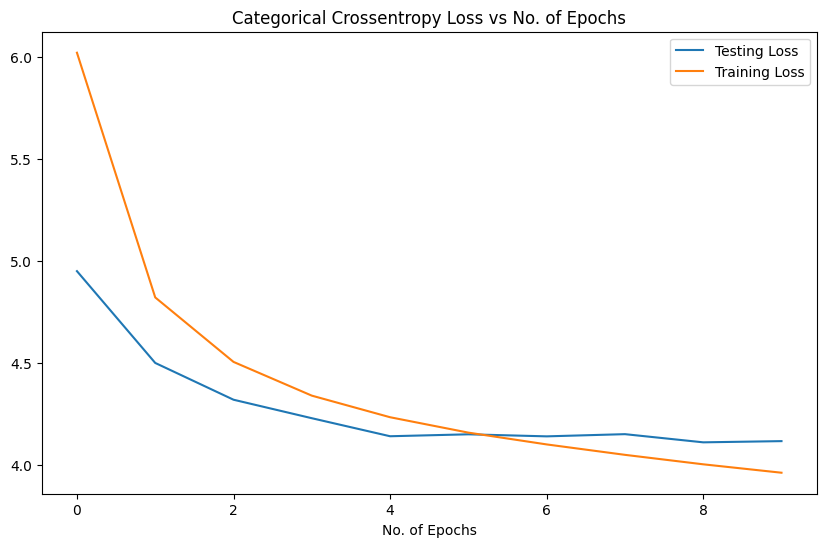

In [82]:
train_loss_values = []
test_loss_values = []
for epoch in range(EPOCHS):
    start = time.time()

    train_loss.reset_states()
    val_loss.reset_states()
    #training set - forward prop, loss fn, (gradient descent and optimization) backprop
    for (batch, (inp, tar)) in enumerate(dataset):
        train_step(inp, tar)
    
        # 85k samples
        # we display 3 batch results -- 0th, middle and last one (approx)
        # 85k / 64 ~ 1328; 1328 / 2 ~ 664
        if batch % 2601 == 0:
            print ('Epoch {} ========> Batch {} Loss {:.4f}'.format(epoch + 1, batch, train_loss.result().numpy()))
      
    if (epoch + 1) % 2 == 0:
        ckpt_save_path = ckpt_manager.save()
        print ('Saving checkpoint for epoch {} at {}'.format(epoch+1, ckpt_save_path))

    train_loss_values.append(train_loss.result().numpy())
    
    #test set - forward pass, loss fn (no backward pass)
    for (batch, (inp, tar)) in enumerate(test_dataset):
        val_step(inp, tar)

    test_loss_values.append(val_loss.result().numpy())
    
    print ('Epoch {}/{} ========> Training Loss {:.4f} Test/Validation Loss {:.4f}'.format(epoch + 1, EPOCHS, train_loss.result().numpy(), val_loss.result().numpy()))
    
    print ('Time taken for epoch {}: {:.2f} secs\n'.format(epoch+1, time.time() - start))
no_of_epochs = [i for i in range(EPOCHS)]
fig , ax = plt.subplots(1,1)
fig.set_size_inches(10,6)
ax.plot(no_of_epochs, test_loss_values, label = 'Testing Loss')
ax.plot(no_of_epochs, train_loss_values, label = 'Training Loss')
ax.set_title('Categorical Crossentropy Loss vs No. of Epochs')
ax.legend()
ax.set_xlabel("No. of Epochs")
plt.show()

In [83]:
with open(default_path+'text_tokenizer.pickle', 'rb') as handle:
    text_tokenizer = pickle.load(handle)
with open(default_path+'summary_tokenizer.pickle', 'rb') as handle:
    summary_tokenizer = pickle.load(handle)
max_text_len = 300
max_summary_len = 16 

In [84]:
def predict(input_document):
    # #clean
    #input_document = preprocess_tokenize(input_document)
    input_document = "sostok "+input_document+" eostok"
    #tokenize
    input_document = text_tokenizer.texts_to_sequences([input_document])
    #padding
    input_document = tf.keras.preprocessing.sequence.pad_sequences(input_document, maxlen=max_text_len, padding='post', truncating='post')

    encoder_input = tf.expand_dims(input_document[0], 0)

    decoder_input = [summary_tokenizer.word_index["sostok"]]
    output = tf.expand_dims(decoder_input, 0)
    
    for i in range(max_summary_len):
        enc_padding_mask, combined_mask, dec_padding_mask = create_masks(encoder_input, output)

        predictions, attention_weights = transformer(
            encoder_input, 
            output,
            False,
            enc_padding_mask,
            combined_mask,
            dec_padding_mask,
        )

        predictions = predictions[: ,-1:, :]
        predicted_id = tf.cast(tf.argmax(predictions, axis=-1), tf.int32)

        if predicted_id == summary_tokenizer.word_index["eostok"]:
            return tf.squeeze(output, axis=0), attention_weights

        output = tf.concat([output, predicted_id], axis=-1)

    return tf.squeeze(output, axis=0), attention_weightsdef summarize(input_document):
    # not considering attention weights for now, can be used to plot attention heatmaps in the future
    summarized = predict(input_document=input_document)[0].numpy()
    summarized = np.expand_dims(summarized[1:], 0)  # not printing <go> token
    return summary_tokenizer.sequences_to_texts(summarized)[0]  # since there is just one translated document
summarize("यूपी के लाल हैं कोविंद, दलित विरोधी हैं मायावतीः केशव मौर्या")

SyntaxError: invalid syntax (2505019680.py, line 35)

In [ ]:
documents = test["article"]
summary = test["headline"]samples = [17, 35, 69, 21, 26]
docs = []
summ = []
pred = []
for i in samples:
  pred.append(summarize(documents[i]))
  docs.append(' '.join(documents[i].split(' ')[:100]))
  summ.append(summary[i])


result_df = pd.DataFrame({'Input': docs, 'Reference Summary': summ, 'Model Output Summary': pred, 'Padding':pred })
result_df[['Input', 'Reference Summary', 'Model Output Summary']] #17, 69, 21, 26, 35
result_df.style.set_properties(subset=['Input', 'Padding'], **{'width': '400px'})

In [ ]:
from rouge import Roug

In [ ]:
rouge = Rouge()

In [ ]:
summary = result_df['Model Output Summary'][0]
reference = result_df['Reference Summary'][0]

In [ ]:
rouge.get_scores(summary,reference)